<a href="https://colab.research.google.com/github/ihsanmauri/Telkom-DTI/blob/master/Hate_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deteksi Ujaran Kebencian**

Dataset ini mengandung sejumlah kata-kata yang mengundang HS dan non_HS yang artinya Hate Speech dan Non Hate Speech secara berturut-turut. Data ini diambil dari laman [github](https://github.com/ialfina/id-hatespeech-detection) ini. 

Kemudian dari data-data tersebut perlu dibuatkan model untuk memprediksi apakah hasil akan dapat HS atau non_HS


# **Explorasi Data**

In [66]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
df = pd.read_table('https://raw.githubusercontent.com/ihsanmauri/Telkom-DTI/master/Deteksi%20Ujaran%20Kebencian/IDHSD_RIO_unbalanced_713_2017.txt')
df.head()

,Label,Tweet
0,Non_HS,RT @spardaxyz: Fadli Zon Minta Mendagri Segera...
1,Non_HS,RT @baguscondromowo: Mereka terus melukai aksi...
2,Non_HS,Sylvi: bagaimana gurbernur melakukan kekerasan...
3,Non_HS,"Ahmad Dhani Tak Puas Debat Pilkada, Masalah Ja..."
4,Non_HS,RT @lisdaulay28: Waspada KTP palsu.....kawal P...


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   713 non-null    object
 1   Tweet   713 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [69]:
df['Label'].value_counts()

Non_HS    453
HS        260
Name: Label, dtype: int64

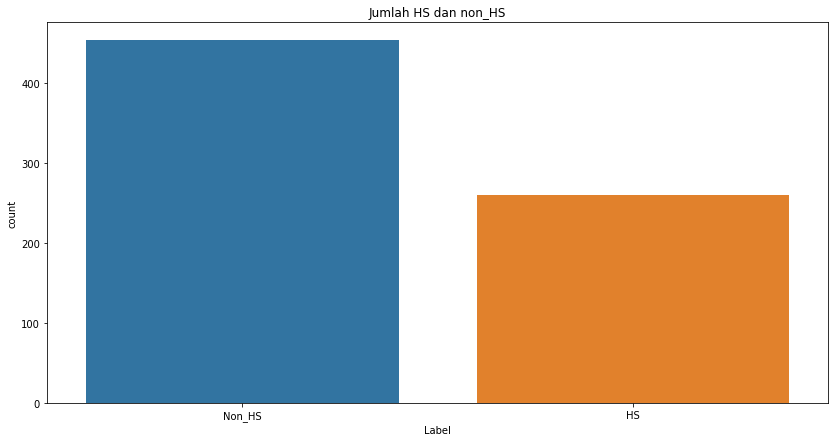

In [70]:
plt.figure(figsize=(14, 7))
plt.title('Jumlah HS dan non_HS')
sns.countplot(x = df['Label'])
plt.show()

Dari bar chart di atas dapat disimpulkan bahwa non_HS lebih banyak daripada HS

# **Pembagian Data Training dan Test**

In [71]:
#split the dataset into 70% for training and the rest for the test
#train dataset
train_Tweets=df.Tweet[:499]
train_Labels=df.Label[:499]
#test dataset
test_Tweets=df.Tweet[499:]
test_Labels=df.Label[499:]
print(train_Tweets.shape,train_Labels.shape)
print(test_Tweets.shape,test_Labels.shape)

(499,) (499,)
(214,) (214,)


# **Data Cleansing**

Text Normalization

In [72]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('indonesian')

In [73]:
def remove_user(text):
  text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  return text.replace("http://", " ").replace("https://", " ")

df['Tweet'] = df['Tweet'].apply(remove_user)

Removing html strips and noise text

In [74]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
df['Tweet']=df['Tweet'].apply(denoise_text)



Removing special characters


In [75]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
df['Tweet']=df['Tweet'].apply(remove_special_characters)

Text stemming

In [76]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
df['Tweet']=df['Tweet'].apply(simple_stemmer)



Removing stopwords


In [77]:
#set stopwords to english
stop=set(stopwords.words('indonesian'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
df['Tweet']=df['Tweet'].apply(remove_stopwords)

{'benarkah', 'dimaksudkannya', 'rasanya', 'mengungkapkan', 'umumnya', 'teringat', 'perlunya', 'sedangkan', 'ditunjukkan', 'lalu', 'agaknya', 'begitulah', 'jikalau', 'pihak', 'menjadi', 'jawab', 'akhirnya', 'sebisanya', 'mempersiapkan', 'tadi', 'sekitarnya', 'maka', 'ke', 'sudah', 'ia', 'boleh', 'memperlihatkan', 'kala', 'bulan', 'ingin', 'benarlah', 'termasuk', 'ditandaskan', 'kamilah', 'lainnya', 'kemudian', 'sesuatu', 'wong', 'diungkapkan', 'ini', 'harusnya', 'apabila', 'tutur', 'berkenaan', 'lewat', 'dapat', 'saya', 'mereka', 'betulkah', 'semua', 'disebut', 'disebutkannya', 'kembali', 'berarti', 'sebuah', 'tampak', 'kesampaian', 'kelihatan', 'diri', 'yang', 'merasa', 'dikerjakan', 'enggaknya', 'belumlah', 'bekerja', 'disebutkan', 'masing', 'apakah', 'menunjukkan', 'buat', 'semata-mata', 'antaranya', 'yakin', 'berujar', 'kepada', 'kasus', 'jumlahnya', 'tiba-tiba', 'dahulu', 'sebut', 'seketika', 'tegasnya', 'apatah', 'waduh', 'misalkan', 'beginian', 'sebesar', 'ditanyakan', 'perlu', '

Normalized train reviews

In [78]:
#normalized train Tweets
norm_train_Tweets=df.Tweet[:499]
norm_train_Tweets[0]
#convert dataframe to string
#norm_train_string=norm_train_Tweets.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'RT fadli zon mendagri menonaktifkan ahok gubernur dki'



Normalized test reviews


In [79]:
#Normalized test Tweets
norm_test_Tweets=df.Tweet[499:]
norm_test_Tweets[500]
##convert dataframe to string
#norm_test_string=norm_test_tweets.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words

'RT overdosi _tv membela penista agama'

# **Data Engineering**

**Bags of Words Model**

Digunakan sebagai cara untuk mengubah dokumen teks menjadi angka vektor atau bag of words


    



In [80]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train Tweets
cv_train_Tweets=cv.fit_transform(norm_train_Tweets)
#transformed test Tweets
cv_test_Tweets=cv.transform(norm_test_Tweets)

print('BOW_cv_train:',cv_train_Tweets.shape)
print('BOW_cv_test:',cv_test_Tweets.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (499, 7226)
BOW_cv_test: (214, 7226)


In [81]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_Tweets=tv.fit_transform(norm_train_Tweets)
#transformed test reviews
tv_test_Tweets=tv.transform(norm_test_Tweets)
print('Tfidf_train:',tv_train_Tweets.shape)
print('Tfidf_test:',tv_test_Tweets.shape)

Tfidf_train: (499, 7226)
Tfidf_test: (214, 7226)


**Labeling the label text**

In [82]:
#labeling the label data
lb=LabelBinarizer()
#transformed label data
Label_data=lb.fit_transform(df['Label'])
print(Label_data.shape)

(713, 1)


**Split the label data**

In [83]:
#Spliting the label data
train_Labels=Label_data[:499]
test_Labels=Label_data[499:]
print(train_Labels)
print(test_Labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


# **Modelling**



**1. Logistic Regression**

In [84]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=50,C=1,random_state=20)

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_Tweets,train_Labels)
print(lr_bow)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_Tweets,train_Labels)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=20, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=20, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**Logistic regression model performane on test dataset**

In [85]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_Tweets)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_Tweets)
print(lr_tfidf_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Accuracy of the model**

In [86]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_Labels,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

lr_bow_score : 0.0


**Print the classification report**

In [87]:
##Classification report for bag of words 
lr_bow_report=classification_report(test_Labels,lr_bow_predict,target_names=['HS','Non_HS'])
print(lr_bow_report)

              precision    recall  f1-score   support

          HS       0.00      0.00      0.00     214.0
      Non_HS       0.00      0.00      0.00       0.0

    accuracy                           0.00     214.0
   macro avg       0.00      0.00      0.00     214.0
weighted avg       0.00      0.00      0.00     214.0



**Confusion Matrix**

In [88]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_Labels,lr_bow_predict,labels=[1,0])
print(cm_bow)

[[  0   0]
 [214   0]]


**2. SVM**

In [89]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_Tweets,train_Labels)
print(svm_bow)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


**Model performance on test data**

In [90]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_Tweets)
print(svm_bow_predict)
#Predicting the model for tfidf features

[1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0]


**Accuracy of the model**

In [91]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_Labels,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features

svm_bow_score : 0.37850467289719625


**Print the classification report**

In [92]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_Labels,svm_bow_predict,target_names=['HS','Non_HS'])
print(svm_bow_report)

              precision    recall  f1-score   support

          HS       1.00      0.38      0.55       214
      Non_HS       0.00      0.00      0.00         0

    accuracy                           0.38       214
   macro avg       0.50      0.19      0.27       214
weighted avg       1.00      0.38      0.55       214



**Confusion matrix**


In [93]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_Labels,svm_bow_predict,labels=[1,0])
print(cm_bow)

[[  0   0]
 [133  81]]


# **Word Cloud**

Berikut word cloud untuk Hate Speech

<function matplotlib.pyplot.show>

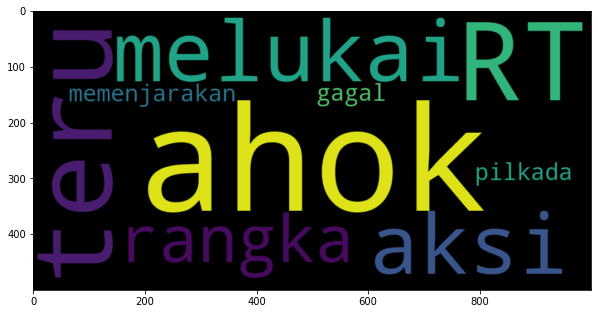

In [ ]:
#word cloud for HS tweet words
plt.figure(figsize=(10,10))
HS_text=norm_train_Tweets[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
HS_words=WC.generate(HS_text)
plt.imshow(HS_words,interpolation='bilinear')
plt.show

Berikut word cloud untuk non_HS

<function matplotlib.pyplot.show>

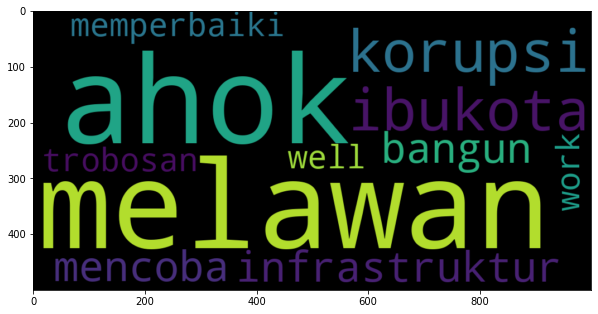

In [ ]:
#Word cloud for non_HS tweet words
plt.figure(figsize=(10,10))
non_HS_text=norm_train_Tweets[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
non_HS_words=WC.generate(non_HS_text)
plt.imshow(non_HS_words,interpolation='bilinear')
plt.show

# **Kesimpulan**

1.   Model: Dapat disimpulkan bahwa SVM lebih cocok modelnya ketimbang regresi, dikarenkan nilai acc score, precision, recall, dll lebih baik ketimbang regresi. Walaupun dalam segi memprediksinya keduanya sangatlah masih sangat jauh dari kata optimal
2.   Word Cloud Graphic: Terlihat bahwa untuk kata-kata HS dan Non_HS yang sering terlihat adalah "ahok", dapat dipungkiri bahwasannya netizen ada yang membenci ahok dan ada yang mendukung ahok

